In [52]:
import pandas as pd
import librosa
import numpy as np
import os
import soundfile as sf

TRAIN_DATA_PATH = "datasets/addresso/train/"

In [48]:
cc = pd.read_csv('datasets/addresso/train/cc_meta_data.csv')
cd = pd.read_csv('datasets/addresso/train/cd_meta_data.csv')

cc['class'] = 1
cd['class'] = 0

train_df = pd.concat([cc, cd], ignore_index=True)
train_df.head()

,ID,age,gender,mmse,class
0,S001,74,male,NaN,1
1,S002,62,female,30.0,1
2,S003,69,female,29.0,1
3,S004,71,female,30.0,1
4,S005,74,female,30.0,1


In [57]:
def group_wav_files_by_id(files):
    files_dict = {}
    for file in files:
        if not file.endswith('.wav'):
            continue
        id = file.split('-')[0]
        if id not in files_dict:
            files_dict[id] = []
        files_dict[id].append(file)
    return files_dict

In [64]:
def concat_wav_files(files, output_file):
    data = []
    for file in files:
        y, sr = librosa.load(file)
        data.append(y)
    data = np.concatenate(data)
    sf.write(output_file, data, sr, subtype='PCM_24')

In [65]:
all_cc_files = os.listdir(TRAIN_DATA_PATH + 'normalised/cc')
all_cd_files = os.listdir(TRAIN_DATA_PATH + 'normalised/cd')

os.mkdir(TRAIN_DATA_PATH + 'concatenated')
os.mkdir(TRAIN_DATA_PATH + 'concatenated/cc')
for id, files in group_wav_files_by_id(all_cc_files).items():
    output_file = TRAIN_DATA_PATH + 'concatenated/cc/' + id + '.wav'
    concat_wav_files([TRAIN_DATA_PATH + 'normalised/cc/' + file for file in files], output_file)

os.mkdir(TRAIN_DATA_PATH + 'concatenated/cd')
for id, files in group_wav_files_by_id(all_cd_files).items():
    output_file = TRAIN_DATA_PATH + 'concatenated/cd/' + id + '.wav'
    concat_wav_files([TRAIN_DATA_PATH + 'normalised/cd/' + file for file in files], output_file)

In [66]:
y, sr = librosa.load('datasets/addresso/train/concatenated/cd/S079.wav')

In [67]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_fft=400, hop_length=160, n_mfcc=20)

/Users/jen/mambaforge/envs/torch-gpu/lib/python3.8/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


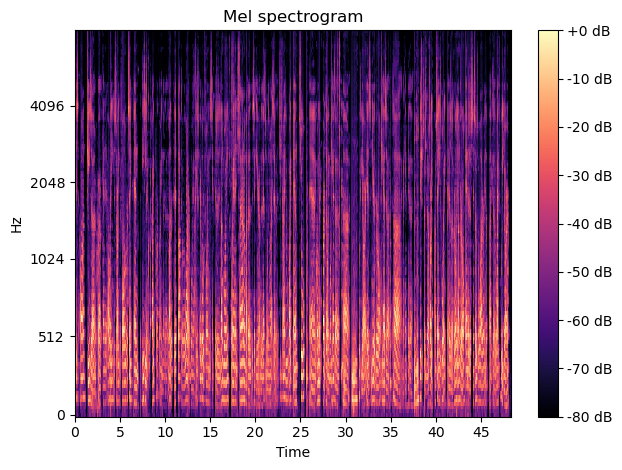

In [68]:
import matplotlib.pyplot as plt
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000)

plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
print(mfcc.shape)

(20, 242)
